# Problem Set 7

In [2]:
import numpy as np    
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.optimize import minimize

Problem 1 <br>
a.Say, you have the equation system, given by x+0.5y-2=0 and 4x+5y=2. Write this upin matrix notation and solve the system using matrix inversion in Python. <br> b.Try to do the same with the following equation system: x+2y -4= 0 and 5x+10y = 2. What happens? <br>c.The function f(a) is implicitly defined by the x that solves the equation ax - exp(x) = 0. Define the function using a call to a solver from the Scipy library and plot the function.<br> d.The function f(a) is implicitly defined by the x that maximizes exp(-0.5x^2)+ax. Definethe function using a call to a minimizer from the Scipy library and plot the function.

In [3]:
e = np.array([[1,0.5],[4,5]])
sol = np.array([[2],[2]])
x = np.linalg.inv(e) @ sol
print(x)
print(e @ x)

[[ 3.]
 [-2.]]
[[2.]
 [2.]]


In [4]:
e = np.array([[1,2],[5,10]])
sol = np.array([[4],[2]])
x = np.linalg.inv(e) @ sol
print(x)
print(e @ x) 

[[ 6.48518346e+16]
 [-3.24259173e+16]]
[[0.]
 [0.]]


We can see that in this case the solution provided doesn't give the right result. 

[-276.10007928]


C:\Users\malag\anaconda3\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The number of calls to function has reached maxfev = 400.
  warnings.warn(msg, RuntimeWarning)


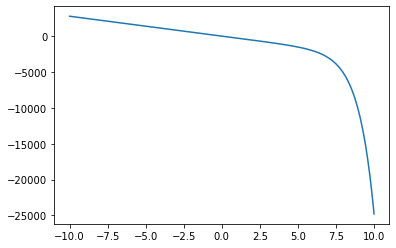

In [5]:
from scipy.optimize import fsolve
xs = np.linspace(-10,10,1000)
f = lambda x,a =0: a*x - np.exp(x) 
a = fsolve(f, 0)
print(a)

plt.plot(xs,f(xs,a)) ; plt.show()

[1.34217728e+08]


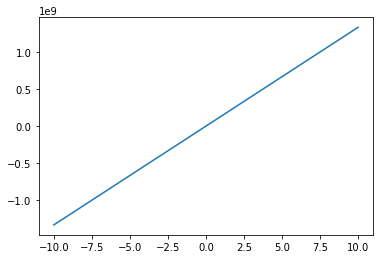

In [6]:
# f = lambda x,a=1: np.exp(-0.5*np.power(x,2))+a*x
# x = np.linspace(0.1,10,90) ; ast = np.arange(0.1,1,0.01)  ; anse = []
# for a in range(len(ast)):
#     ans = minimize(lambda x,a : -f(x,a),0).x
#     anse.append(ans)

# plt.plot(x, f(x,anse))

xs = np.linspace(-10,10,1000)
f = lambda x,a =0: np.exp(-0.5*np.power(x,2))+a*x
a = fsolve(f, 0)
print(a)

plt.plot(xs,f(xs,a)) ; plt.show()

[1.34217728e+08]
[-0.]
[0.]


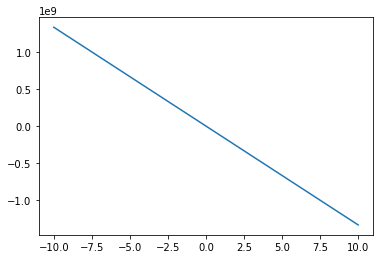

In [7]:
def f(y,a = 0):
    return -(np.exp(-0.5*np.power(y,2))+a*y)
a=fsolve(f,0)
print(a)
print(f(a))
plt.plot(xs, f(xs,a))

b = minimize(f,0).x
print(b)

[0. 0.]
-1.0


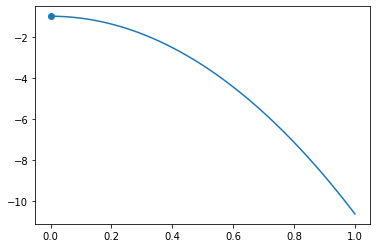

In [13]:
import scipy.optimize as optimize

a = np.linspace(0,10,100) ; x = np.linspace(0,1,100) ; pa = [a,x]

def f(params):
    # print(params)  # <-- you'll see that params is a NumPy array
    a = params[0] ; x = params[1] # <-- for readability you may wish to assign names to the component variables
    return -(np.exp(-0.5*np.power(x,2))+a*x)

initial_guess = [0, 0]
result = optimize.minimize(f, initial_guess, method = 'BFGS')
if result.success:
    fitted_params = result.x
    print(fitted_params)
    print(result.fun)
else:
    raise ValueError(result.message)

plt.plot(x, f(pa))
plt.scatter(result.x[0], f(result.x))

## Problem 2
In this problem, we are going to work with two utility functions: $$u1 = 0.6 \times log(x) + 0.4 \times log(y) $$
$$u2 = y + 1/(1+\frac{1}{e} ) \times x^{(1+ \frac{1}{e} )} $$
Derive a demand curve (for good x as a price of x for each of the utility functions). Assume that income = 10 and the price of good y is 1. <br> We will consider a price change from 1 to 2 on good x. <br>
Our problem concerns how to measure the cost to the consumer (the welfare consequences) of the price change. (Thereason this is not trivial is that the consumer can adjust demand, right!)

In [ ]:
I = 10 ; py = 1    
# price change px 1 -- 2